## Exercise - Investigate High Paying Skills

In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x if isinstance(x, list) else None)

In [3]:
df_US_DA = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NaN values from 'salary_year_avg' column for accurate visualization
df_US_DA = df_US_DA.dropna(subset=['salary_year_avg'])

In [10]:
df_US_DA = df_US_DA.explode('job_skills')

df_US_DA_group = df_US_DA.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

## Sorting Top 10 Highest Paid Skills for Data Analysts

In [17]:
df_DA_top_pay = df_US_DA_group.sort_values(by='median', ascending=False).head(10)

df_DA_top_pay

,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


## Sorting Top 10 Most In-Demand Skills for Data Analysts

In [18]:
df_DA_skills = df_US_DA_group.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False)

df_DA_skills

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


(0.0, 206062.5)

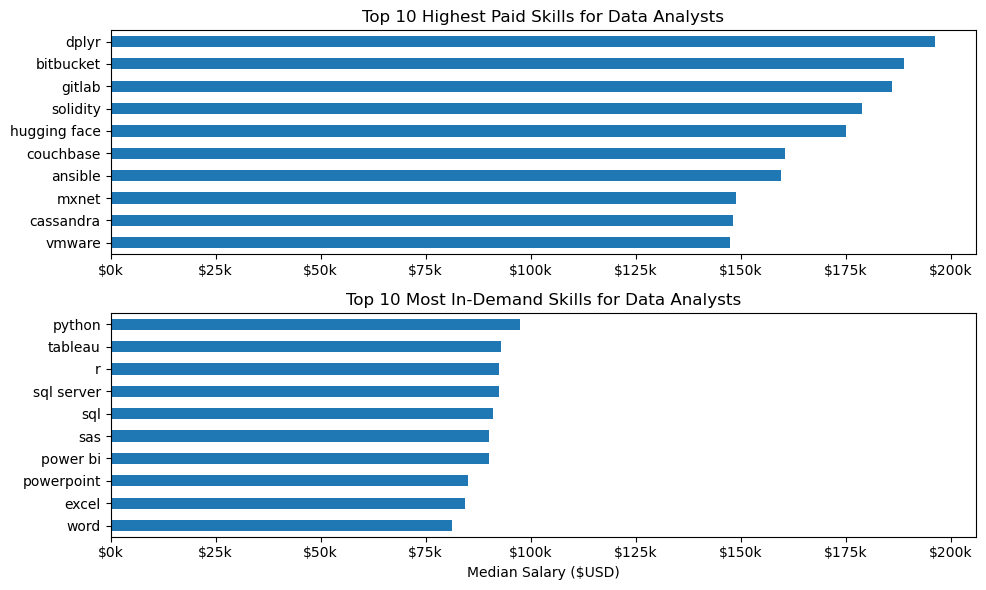

In [43]:
fig, ax = plt.subplots(2,1)

df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], figsize=(10,6), legend=False)
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))

df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))


fig.tight_layout()
ax[1].set_xlim(ax[0].get_xlim())